# NYC Street Trees

* **Data:** `street-trees.csv`
* **Description:** Every five years New York City counts all of the trees that are planted on the streets of the city (not in parks).
* **Source:** https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh
* **Columns of interest:**
    * `tree_dbh` width of the tree's trunk, in inches. If it's `0`, it was not measured.
    * `stump_diam` width of the tree's stump, in inches (if the tree has been cut down). If it's `0`, it was not measured.
    * `curb` how close to the curb it is
    * `status` whether it is alive or not
    * `health` how healthy it is 
    * `spc_latin` the Latin/scientific name for the tree
    * `guards` whether guards are installed to protect it from trees/dogs/etc
    * `sidewalk` whether the roots have damaged the surrounding sidewalk
    * `zipcode` Five-digit zipcode in which tree is located
    * `borough` Name of borough in which tree is located
    * `nta_name` Name of neighborhood in which tree is located

## Read in your data

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", '{:,}'.format)
df = pd.read_csv('street-trees.csv')
df.head()

/Users/owner/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trnk_wire,trnk_light,trnk_other,brnch_ligh,brnch_shoe,brnch_othe,address,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,Latitude,longitude,x_sp,y_sp
0,08/27/2015,180683,348711,POINT (-73.84421521958048 40.723091773924274),3.0,NaN,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.72309177,-73.84421522,"1,027,431.14821","202,756.768749"
1,09/03/2015,200540,315986,POINT (-73.81867945834878 40.79411066708779),21.0,NaN,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.79411067,-73.81867946,"1,034,455.70109","228,644.837379"
2,09/05/2015,204026,218365,POINT (-73.93660770459083 40.717580740099116),3.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.71758074,-73.9366077,"1,001,822.83131","200,716.891267"
3,09/05/2015,204337,217969,POINT (-73.93445615919741 40.713537494833226),10.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.71353749,-73.93445616,"1,002,420.35833","199,244.253136"
4,08/30/2015,189565,223043,POINT (-73.97597938483258 40.66677775537875),21.0,NaN,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.66677776,-73.97597938,"990,913.775046","182,202.425999"


## What is the percentage of alive vs dead trees?

In [2]:
df.status.value_counts(normalize=True) * 100

Alive    95.37649095918617
Stump    2.581794357315425
Dead    2.0417146834983946
Name: status, dtype: float64

## Filter your dataframe to only been trees that are still alive

In [3]:
df[df.status == 'Alive']

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trnk_wire,trnk_light,trnk_other,brnch_ligh,brnch_shoe,brnch_othe,address,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,Latitude,longitude,x_sp,y_sp
0,08/27/2015,180683,348711,POINT (-73.84421521958048 40.723091773924274),3.0,NaN,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.72309177,-73.84421522,"1,027,431.14821","202,756.768749"
1,09/03/2015,200540,315986,POINT (-73.81867945834878 40.79411066708779),21.0,NaN,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.79411067,-73.81867946,"1,034,455.70109","228,644.837379"
2,09/05/2015,204026,218365,POINT (-73.93660770459083 40.717580740099116),3.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.71758074,-73.9366077,"1,001,822.83131","200,716.891267"
3,09/05/2015,204337,217969,POINT (-73.93445615919741 40.713537494833226),10.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.71353749,-73.93445616,"1,002,420.35833","199,244.253136"
4,08/30/2015,189565,223043,POINT (-73.97597938483258 40.66677775537875),21.0,NaN,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.66677776,-73.97597938,"990,913.775046","182,202.425999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,08/18/2015,155433,217978,POINT (-73.95494401022562 40.7132107823145),25.0,NaN,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,32 MARCY AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3051900,New York,40.71321078,-73.95494401,"996,740.685965","199,121.636255"
683784,08/29/2015,183795,348185,POINT (-73.85665019989099 40.71519444267162),7.0,NaN,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,67-035 SELFRIDGE STREET,11375,Forest Hills,406,4,Queens,29,28,15,QN17,Forest Hills,4070700,New York,40.71519444,-73.8566502,"1,023,989.07438","199,873.647547"
683785,08/22/2015,166161,401670,POINT (-74.13651724205825 40.62076152739799),12.0,NaN,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,130 BIDWELL AVENUE,10314,Staten Island,501,5,Staten Island,50,63,24,SI07,Westerleigh,5020100,New York,40.62076153,-74.13651724,"946,351.410431","165,466.07627"
683786,08/29/2015,184028,504204,POINT (-73.90311472453581 40.850828186655754),9.0,NaN,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1985 ANTHONY AVENUE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2023502,New York,40.85082819,-73.90311472,"1,011,053.64553","249,271.950653"


## What are the most common kinds of trees? Make a horizontal bar plot of the top five types of trees, with the longest bar at the top.

In [4]:
df.spc_common.value_counts()

London planetree    87014
honeylocust         64264
Callery pear        58931
pin oak             53185
Norway maple        34189
                    ...  
black pine             37
pitch pine             33
Osage-orange           29
Scots pine             25
Virginia pine          10
Name: spc_common, Length: 132, dtype: int64

<AxesSubplot:>

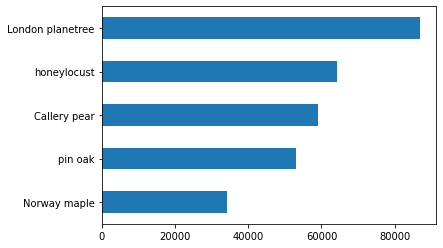

In [5]:
df.spc_common.value_counts().head(5).sort_values().plot(kind='barh')

## For trees in Manhattan, what are the top 3 kinds of trees?

In [16]:
df['spc_common'][df.boroname == 'Manhattan'].value_counts()


# df.manhattan.groupby('spc_common').sort_values()

# Technically this does work: 
# df['spc_common'][df.boroname == 'Manhattan'].value_counts()
# but generally people use this instead: 
df[df.boroname == 'Manhattan']['spc_common'].value_counts()
# in that you filter first, then get the column you're interested in

honeylocust         13176
Callery pear         7297
ginkgo               5859
pin oak              4584
Sophora              4453
                    ...  
spruce                  1
Osage-orange            1
red pine                1
Persian ironwood        1
smoketree               1
Name: spc_common, Length: 128, dtype: int64

## What borough has the most trees in our dataset?

In [7]:
df.boroname.value_counts()

Queens           250551
Brooklyn         177293
Staten Island    105318
Bronx             85203
Manhattan         65423
Name: boroname, dtype: int64

## Save a CSV file of just Honey Locust trees, calling it `honey-locusts.csv`

In [8]:
df[df.spc_common == 'honeylocust'].to_csv('honey-locusts.csv')
# pd.read_csv('honey-locusts.csv')

## How many trees are elm trees?

Count both `American elm` and `Chinese elm`.

In [9]:
df[(df.spc_common == 'American elm') | (df.spc_common == 'Chinese elm')]



,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trnk_wire,trnk_light,trnk_other,brnch_ligh,brnch_shoe,brnch_othe,address,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,Latitude,longitude,x_sp,y_sp
72,09/08/2015,209441,503960,POINT (-73.91763219387903 40.846375825268666),5.0,NaN,OnCurb,Alive,Poor,Ulmus americana,American elm,None,None,NoDamage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,75 FEATHERBED LANE,10453,Bronx,205,2,Bronx,14,77,29,BX36,University Heights-Morris Heights,2021502,New York,40.84637583,-73.91763219,"1,007,038.86419","247,645.677987"
77,09/08/2015,209909,504038,POINT (-73.90688618113626 40.848106229042735),2.0,NaN,OnCurb,Alive,Good,Ulmus americana,American elm,None,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,1840 GRAND CONCOURSE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2023302,New York,40.84810623,-73.90688618,"1,010,011.31362","248,279.107166"
78,08/27/2015,180295,106100,POINT (-73.9829175035826 40.77013008975271),2.0,NaN,OnCurb,Alive,Good,Ulmus americana,American elm,1or2,None,NoDamage,Volunteer,"WiresRope,BranchOther",No,No,No,Yes,No,No,No,No,Yes,13 WEST 61 STREET,10023,New York,107,1,Manhattan,3,67,27,MN14,Lincoln Square,1014500,New York,40.77013009,-73.9829175,"988,981.66605","219,856.39892"
98,09/07/2015,208247,106402,POINT (-73.97308772691781 40.78250569576515),29.0,NaN,OnCurb,Alive,Fair,Ulmus americana,American elm,1or2,Helpful,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,15 WEST 81 STREET,10024,New York,107,1,Manhattan,6,67,29,MN12,Upper West Side,1016500,New York,40.7825057,-73.97308773,"991,703.022156","224,365.931895"
120,09/02/2015,196440,108889,POINT (-73.96412322243684 40.81114537770991),5.0,NaN,OnCurb,Alive,Fair,Ulmus americana,American elm,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,475 RIVERSIDE DRIVE,10115,New York,109,1,Manhattan,7,69,31,MN09,Morningside Heights,1020500,New York,40.81114538,-73.96412322,"994,181.357422","234,801.253216"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683441,08/29/2015,185824,505273,POINT (-73.89209877010845 40.85009007642288),10.0,NaN,OnCurb,Alive,Fair,Ulmus americana,American elm,None,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,2100 LA FONTAINE AVENUE,10457,Bronx,206,2,Bronx,15,86,33,BX17,East Tremont,2037504,New York,40.85009008,-73.89209877,"1,014,101.5771","249,006.591603"
683450,08/31/2015,192475,104604,POINT (-73.99242349700346 40.75165328234461),9.0,NaN,OnCurb,Alive,Good,Ulmus americana,American elm,1or2,Helpful,Damage,Volunteer,TrunkOther,No,No,No,No,No,Yes,No,No,No,247 WEST 34 STREET,10001,New York,105,1,Manhattan,3,75,31,MN17,Midtown-Midtown South,1010100,New York,40.75165328,-73.9924235,"986,349.191328","213,124.321505"
683451,08/31/2015,192477,104604,POINT (-73.99282954783796 40.751824276556896),10.0,NaN,OnCurb,Alive,Good,Ulmus americana,American elm,1or2,Helpful,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,259 WEST 34 STREET,10001,New York,105,1,Manhattan,3,75,31,MN17,Midtown-Midtown South,1010100,New York,40.75182428,-73.99282955,"986,236.683351","213,186.61075"
683504,08/31/2015,192478,104604,POINT (-73.99299436771383 40.75189368417311),11.0,NaN,OnCurb,Alive,Good,Ulmus americana,American elm,1or2,Helpful,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,272 WEST 34 STREET,10001,New York,105,1,Manhattan,3,75,31,MN17,Midtown-Midtown South,1010100,New York,40.75189368,-73.99299437,"986,191.015463","213,211.894492"


## Create a new column called `width_cm` that is the width of the tree trunk in centimeters

You'll probably get a warning about "A value is trying to be set on a copy of a slice from a DataFrame." That's fine! It just means that this is only applying to alive trees, not the original CSV that includes dead trees and stumps.

In [10]:
df['width_cm'] = df.tree_dbh * 2.54
df

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trnk_wire,trnk_light,trnk_other,brnch_ligh,brnch_shoe,brnch_othe,address,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,Latitude,longitude,x_sp,y_sp,width_cm
0,08/27/2015,180683,348711,POINT (-73.84421521958048 40.723091773924274),3.0,NaN,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.72309177,-73.84421522,"1,027,431.14821","202,756.768749",7.62
1,09/03/2015,200540,315986,POINT (-73.81867945834878 40.79411066708779),21.0,NaN,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.79411067,-73.81867946,"1,034,455.70109","228,644.837379",53.34
2,09/05/2015,204026,218365,POINT (-73.93660770459083 40.717580740099116),3.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.71758074,-73.9366077,"1,001,822.83131","200,716.891267",7.62
3,09/05/2015,204337,217969,POINT (-73.93445615919741 40.713537494833226),10.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.71353749,-73.93445616,"1,002,420.35833","199,244.253136",25.4
4,08/30/2015,189565,223043,POINT (-73.97597938483258 40.66677775537875),21.0,NaN,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.66677776,-73.97597938,"990,913.775046","182,202.425999",53.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,08/18/2015,155433,217978,POINT (-73.95494401022562 40.7132107823145),25.0,NaN,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,32 MARCY AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3051900,New York,40.71321078,-73.95494401,"996,740.685965","199,121.636255",63.5
683784,08/29/2015,183795,348185,POINT (-73.85665019989099 40.71519444267162),7.0,NaN,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,67-035 SELFRIDGE STREET,11375,Forest Hills,406,4,Queens,29,28,15,QN17,Forest Hills,4070700,New York,40.71519444,-73.8566502,"1,023,989.07438","199,873.647547",17.78
683785,08/22/2015,166161,401670,POINT (-74.13651724205825 40.62076152739799),12.0,NaN,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,130 BIDWELL AVENUE,10314,Staten Island,501,5,Staten Island,50,63,24,SI07,Westerleigh,5020100,New York,40.62076153,-74.13651724,"946,351.410431","165,466.07627",30.48
683786,08/29/2015,184028,504204,POINT (-73.90311472453581 40.850828186655754),9.0,NaN,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1985 ANTHONY AVENUE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2023502,New York,40.85082819,-73.90311472,"1,011,053.64553","249,271.950653",22.86


In [11]:
# df['width_cm']

## What is the median trunk width, in centimeters?

In [12]:
df.width_cm.median()

25.4

## What are the four trees with the widest trunks?

In [13]:
df.sort_values(by='tree_dbh', ascending=False).head(4)


,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trnk_wire,trnk_light,trnk_other,brnch_ligh,brnch_shoe,brnch_othe,address,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,Latitude,longitude,x_sp,y_sp,width_cm
228002,11/05/2015,433258,507833,POINT (-73.8576709209273 40.82195255759996),450.0,NaN,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,1950 LAFAYETTE AVENUE,10473,Bronx,209,2,Bronx,18,87,32,BX09,Soundview-Castle Hill-Clason Point-Harding Park,2001600,New York,40.82195256,-73.85767092,"1,023,642.91497","238,768.666541","1,143.0"
2385,08/23/2015,168583,226040,POINT (-73.94693592253036 40.67228657645615),425.0,NaN,OnCurb,Alive,Good,Quercus bicolor,swamp white oak,1or2,None,Damage,NYC Parks Staff,None,No,No,No,No,No,No,No,No,No,960 STERLING PLACE,11213,Brooklyn,308,3,Brooklyn,35,43,20,BK61,Crown Heights North,3033900,New York,40.67228658,-73.94693592,"998,969.766808","184,212.990548","1,079.5"
180735,10/23/2015,370606,332230,POINT (-73.75061560112965 40.67563634037032),389.0,NaN,OnCurb,Alive,Fair,Liriodendron tulipifera,tulip-poplar,None,None,Damage,NYC Parks Staff,None,No,No,No,No,No,No,No,No,No,136-032 220 PLACE,11413,Springfield Gardens,413,4,Queens,31,29,14,QN66,Laurelton,4035800,New York,40.67563634,-73.7506156,"1,053,424.68972","185,527.415084",988.0600000000001
270395,11/20/2015,476317,602575,POINT (-73.94306676395681 40.85087931360806),318.0,NaN,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1336 RIVERSIDE DRIVE,10033,New York,112,1,Manhattan,10,71,31,MN35,Washington Heights North,1027500,New York,40.85087931,-73.94306676,"1,000,000.76606","249,280.873863",807.72


## What is the median trunk width, in centimeters, of trees that have damaged the sidewalk vs those who have not damaged the sidewalk?

In [14]:
df[df.sidewalk == 'Damage'].width_cm.median()

33.02

In [15]:
df[df.sidewalk == 'NoDamage'].width_cm.median()

20.32